# Sentiment Analysis

## Import libraries

In [1]:
!pip install vaderSentiment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
%matplotlib inline


In [3]:
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
   # tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#)', ' ', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    #tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    #tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
  # tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    tweet = re.sub(' amp ', '&', tweet)
    return tweet

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    # tweet = remove_users(tweet)
    # tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub(' & ', '', tweet)
    return tweet

def tokenize_tweets(df):
    df['tokens'] = df.tweet.apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

## Read the NLP dataset tagged with communities

In [79]:
df1 = pd.read_csv("../network_analysis/df_nlp_com1.csv")
df2 = pd.read_csv("../network_analysis/df_nlp_com2.csv")
df3 = pd.read_csv("../network_analysis/df_nlp_com3.csv")
df4 = pd.read_csv("../network_analysis/df_nlp_com4.csv")
df5 = pd.read_csv("../network_analysis/df_nlp_com5.csv")

/Users/simonamazzarino/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/simonamazzarino/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0,1,8,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39035 entries, 0 to 39034
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            39035 non-null  int64  
 1   conversation_id               39035 non-null  int64  
 2   created_at                    39035 non-null  object 
 3   date                          39035 non-null  object 
 4   time                          39035 non-null  object 
 5   timezone                      39035 non-null  int64  
 6   user_id                       39035 non-null  int64  
 7   name                          39035 non-null  object 
 8   place                         3 non-null      object 
 9   tweet                         39035 non-null  object 
 10  language                      39035 non-null  object 
 11  mentions                      39035 non-null  object 
 12  urls                          39035 non-null  object 
 13  p

In [6]:
print(df1.community.value_counts()[:5])
print('')
print('--------------')
print('')
print(df2.community.value_counts()[:5])
print('')
print('--------------')
print('')
print(df3.community.value_counts()[:5])
print('')
print('--------------')
print('')
print(df4.community.value_counts()[:5])
print('')
print('--------------')
print('')
print(df5.community.value_counts()[:5])

community_46      1854
community_0       1637
community_83       997
community_1616     850
community_1        827
Name: community, dtype: int64

--------------

community_1      1210
community_0      1198
community_878     764
community_5       490
community_29      469
Name: community, dtype: int64

--------------

community_1013    408
community_850     391
community_1001    276
community_171     253
community_508     218
Name: community, dtype: int64

--------------

community_0      444
community_39     362
community_78     352
community_571    262
community_156    190
Name: community, dtype: int64

--------------

community_451    489
community_294    379
community_103    242
community_1      241
community_5      238
Name: community, dtype: int64


In [7]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
df4 = df4.drop_duplicates()
df5 = df5.drop_duplicates()

In [8]:
df1["tweet"] = df1.tweet.astype("str")
df2["tweet"] = df2.tweet.astype("str")
df3["tweet"] = df3.tweet.astype("str")
df4["tweet"] = df4.tweet.astype("str")
df5["tweet"] = df5.tweet.astype("str")

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simonamazzarino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/simonamazzarino/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
df1["preprocessed_tweet"] = df1["tweet"].apply(preprocess_tweet)
df2["preprocessed_tweet"] = df2["tweet"].apply(preprocess_tweet)
df3["preprocessed_tweet"] = df3["tweet"].apply(preprocess_tweet)
df4["preprocessed_tweet"] = df4["tweet"].apply(preprocess_tweet)
df5["preprocessed_tweet"] = df5["tweet"].apply(preprocess_tweet)

## Sentiment Analysis

#### Primo Semestre (gen-giu 2020)

In [11]:
analyser = SentimentIntensityAnalyzer()


In [12]:
pol = lambda x: analyser.polarity_scores(x)

In [13]:
df1['compound'] = [analyser.polarity_scores(x)['compound'] for x in df1['preprocessed_tweet']]
df1['neg'] = [analyser.polarity_scores(x)['neg'] for x in df1['preprocessed_tweet']]
df1['neu'] = [analyser.polarity_scores(x)['neu'] for x in df1['preprocessed_tweet']]
df1['pos'] = [analyser.polarity_scores(x)['pos'] for x in df1['preprocessed_tweet']]

In [14]:
df1['sentiment_type']=''
df1.loc[df1.compound>=0.05,'sentiment_type']='POSITIVE'
df1.loc[(df1.compound > -0.05) & (df1.compound < 0.05),'sentiment_type']='NEUTRAL'
df1.loc[df1.compound<= - 0.05,'sentiment_type']='NEGATIVE'

In [15]:
df1

,id,conversation_id,created_at,date,time,timezone,user_id,name,place,tweet,...,trans_src,trans_dest,community,original_community_extension,preprocessed_tweet,compound,neg,neu,pos,sentiment_type
0,1218684471211245568,1218684471211245568,2020-01-18 23:59:54+00:00,2020-01-18,23:59:54,100,90497917,David Schor (Biden=#BlueTrump) 💚,NaN,#JoeBiden accusing the Sanders campaign of dis...,...,NaN,NaN,community_0,348,joebiden accuse sanders campaign distort recor...,-0.5106,0.400,0.358,0.242,NEGATIVE
1,1242962294302105600,1242962294302105600,2020-03-25 23:51:18+00:00,2020-03-25,23:51:18,100,90497917,David Schor (Biden=#BlueTrump) 💚,NaN,#Bernie is the #AntiTrump #Biden is the #BlueT...,...,NaN,NaN,community_0,348,bernie antitrump biden bluetrump question,0.0000,0.000,1.000,0.000,NEUTRAL
2,1217165029440552961,1217156937193807872,2020-01-14 19:22:11+00:00,2020-01-14,19:22:11,100,90497917,David Schor (Biden=#BlueTrump) 💚,NaN,@Rosario10i @BethLynch2020 No need to attack h...,...,NaN,NaN,community_0,348,rosario bethlynch need attack plenty damage as...,-0.7430,0.474,0.526,0.000,NEGATIVE
3,1249384363738796032,1249005745582018560,2020-04-12 18:10:19+01:00,2020-04-12,18:10:19,100,90497917,David Schor (Biden=#BlueTrump) 💚,NaN,@AndyOstroy @JoeBiden Hey #Biden supporters: t...,...,NaN,NaN,community_0,348,andyostroy joebiden hey biden supporters joebi...,0.4404,0.000,0.734,0.266,POSITIVE
4,1218684453494632449,1218663554250727424,2020-01-18 23:59:50+00:00,2020-01-18,23:59:50,100,175711368,Biden is the More Effective Evil,NaN,@number1fan_2 @BMarchetich There are 2 other v...,...,NaN,NaN,community_55,17,number fan bmarchetich videos joebiden talk cu...,0.1280,0.101,0.725,0.174,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39030,1264271769285857282,1263964462983380992,2020-05-23 20:07:33+01:00,2020-05-23,20:07:33,100,967032222829162498,roleezj,NaN,@realDonaldTrump @deanbaquet Columbia Univ edu...,...,NaN,NaN,community_1393,2,realdonaldtrump deanbaquet columbia univ educa...,0.0516,0.232,0.559,0.209,POSITIVE
39031,1264270613486526470,1264253104737980416,2020-05-23 20:02:57+01:00,2020-05-23,20:02:57,100,799343836614885376,Frankie Garcia,NaN,@TrueBlue100K @twostarsartwork Please.. @JoeBi...,...,NaN,NaN,community_1847,2,trueblue twostarsartwork joebiden biden,0.0000,0.000,1.000,0.000,NEUTRAL
39032,1264267943069679616,1264233824172548096,2020-05-23 19:52:21+01:00,2020-05-23,19:52:21,100,68697271,Itay Komorovski 🇮🇱,NaN,@Silvergt @AriFleischer Now after you #Tweet #...,...,NaN,NaN,community_1584,2,silvergt arifleischer tweet biden longer racis...,0.3182,0.116,0.711,0.173,POSITIVE
39033,1264266065523154946,1263997603693203456,2020-05-23 19:44:53+01:00,2020-05-23,19:44:53,100,901935932122824705,1-65 trump'sCourtRecord,NaN,@BrunoAmato_1 Biden should be more deliberate ...,...,NaN,NaN,community_1619,2,brunoamato biden deliberate speak longer debat...,0.0000,0.000,1.000,0.000,NEUTRAL


(array([0, 1, 2]),
 [Text(0, 0, 'POSITIVE'), Text(1, 0, 'NEGATIVE'), Text(2, 0, 'NEUTRAL')])

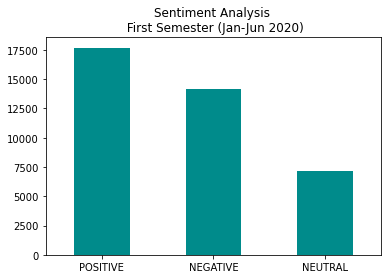

In [16]:
df1.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n First Semester (Jan-Jun 2020)")
plt.xticks(rotation = 0)

In [17]:
df1.sentiment_type.value_counts()

POSITIVE    17690
NEGATIVE    14149
NEUTRAL      7196
Name: sentiment_type, dtype: int64

#### Prime 5 comunità per numero di tweets - Primo Semestre

community_46      1854
community_0       1637
community_83       997
community_1616     850
community_1        827
Name: community, dtype: int64

--------------

POSITIVE    2717
NEGATIVE    2301
NEUTRAL     1147
Name: sentiment_type, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'POSITIVE'), Text(1, 0, 'NEGATIVE'), Text(2, 0, 'NEUTRAL')])

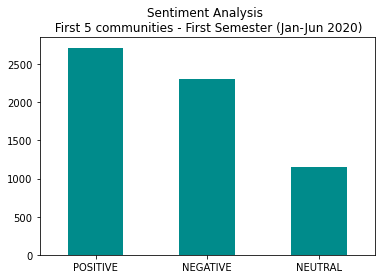

In [18]:
df1_com0 = df1[df1["community"]=="community_0"]
df1_com1 = df1[df1["community"]=="community_1"]
df1_com46 = df1[df1["community"]=="community_46"]
df1_com83 = df1[df1["community"]=="community_83"]
df1_com1616 = df1[df1["community"]=="community_1616"]

joinDf = [df1_com0, df1_com1, df1_com46, df1_com83, df1_com1616]
df1_com = pd.concat(joinDf)
df1_com = df1_com.reset_index(drop=True)
df1_com = df1_com.drop_duplicates()
df1_com["tweet"] = df1_com.tweet.astype("str")
df1_com["preprocessed_tweet"] = df1_com["tweet"].apply(preprocess_tweet)
print(df1_com.community.value_counts())
print('')
print('--------------')
print('')
print(df1_com.sentiment_type.value_counts())


df1_com.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n First 5 communities - First Semester (Jan-Jun 2020)")
plt.xticks(rotation = 0)




#### Secondo Semestre (lug-dic 2020)

In [20]:
df2['compound'] = [analyser.polarity_scores(x)['compound'] for x in df2['preprocessed_tweet']]
df2['neg'] = [analyser.polarity_scores(x)['neg'] for x in df2['preprocessed_tweet']]
df2['neu'] = [analyser.polarity_scores(x)['neu'] for x in df2['preprocessed_tweet']]
df2['pos'] = [analyser.polarity_scores(x)['pos'] for x in df2['preprocessed_tweet']]

In [21]:
df2['sentiment_type']=''
df2.loc[df2.compound>=0.05,'sentiment_type']='POSITIVE'
df2.loc[(df2.compound > -0.05) & (df2.compound < 0.05),'sentiment_type']='NEUTRAL'
df2.loc[df2.compound<= - 0.05,'sentiment_type']='NEGATIVE'

In [22]:
df2

,id,conversation_id,created_at,date,time,timezone,user_id,name,place,tweet,...,trans_src,trans_dest,community,original_community_extension,preprocessed_tweet,compound,neg,neu,pos,sentiment_type
0,1329212446674972672,1327787149878431744,2020-11-18 23:58:37+00:00,2020-11-18,23:58:37,100,751582482055692288,Ana Puig,NaN,@WattersWorld @JesseBWatters #Democrats had to...,...,NaN,NaN,community_1376,2,wattersworld jessebwatters democrats pay creat...,0.7964,0.045,0.680,0.275,POSITIVE
1,1329211220080128007,1328468005408403456,2020-11-18 23:53:45+00:00,2020-11-18,23:53:45,100,751582482055692288,Ana Puig,NaN,@TVNewsHQ @JesseBWatters Of course Juan doesn’...,...,NaN,NaN,community_1376,2,tvnewshq jessebwatters course juan question de...,-0.2500,0.216,0.603,0.181,NEGATIVE
2,1329208082459725828,1328835306909442048,2020-11-18 23:41:17+00:00,2020-11-18,23:41:17,100,751582482055692288,Ana Puig,NaN,@JesseBWatters It’s no wonder #biden didn’t ha...,...,NaN,NaN,community_1376,2,jessebwatters wonder biden work,0.0000,0.000,1.000,0.000,NEUTRAL
3,1338632477934575618,1338616006676254720,2020-12-14 23:50:27+00:00,2020-12-14,23:50:27,100,751582482055692288,Ana Puig,NaN,@SenatorBraun He will never b freakin presiden...,...,NaN,NaN,community_1376,2,senatorbraun freakin president welcome sociali...,0.6249,0.282,0.356,0.361,POSITIVE
4,1326294154343821313,1326294154343821312,2020-11-10 22:42:22+00:00,2020-11-10,22:42:22,100,751582482055692288,Ana Puig,NaN,Who knows he just reads things what he is told...,...,NaN,NaN,community_1376,2,know read things tell think biden clue want want,0.1531,0.000,0.729,0.271,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,1343256045917851649,1343255327622381568,2020-12-27 18:02:52+00:00,2020-12-27,18:02:52,100,3857662152,sandy,NaN,@JoeBiden this line sucks until something big ...,...,NaN,NaN,community_1,205,joebiden line suck big roll joebiden joebide,-0.4404,0.326,0.674,0.000,NEGATIVE
28188,1343254738754809863,1343068648118874112,2020-12-27 17:57:40+00:00,2020-12-27,17:57:40,100,2615829849,Manuel Quijano,NaN,@MarkiCallaway @realDonaldTrump These Republic...,...,NaN,NaN,community_0,292,markicallaway realdonaldtrump republicans know...,-0.5267,0.185,0.815,0.000,NEGATIVE
28189,1343248768372670465,1337496865840001024,2020-12-27 17:33:57+00:00,2020-12-27,17:33:57,100,822678533944332288,Carolyne,NaN,@RepDavidRouzer The Fraud/Treason on Nov3rd ne...,...,NaN,NaN,community_1296,2,repdavidrouzer fraud treason nov need expose s...,0.8807,0.243,0.301,0.456,POSITIVE
28190,1343199774552551424,1343198032238694400,2020-12-27 14:19:16+00:00,2020-12-27,14:19:16,100,1283086926409617417,Programmer and IT expert,NaN,@laurenpeikoff My vision 2021 is to create Net...,...,NaN,NaN,community_966,2,laurenpeikoff vision create network home alert...,0.8957,0.000,0.485,0.515,POSITIVE


(array([0, 1, 2]),
 [Text(0, 0, 'POSITIVE'), Text(1, 0, 'NEGATIVE'), Text(2, 0, 'NEUTRAL')])

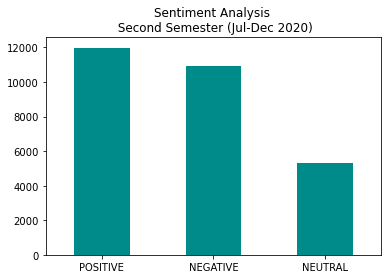

In [23]:
df2.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n Second Semester (Jul-Dec 2020)")
plt.xticks(rotation = 0)

In [24]:
df2.sentiment_type.value_counts()

POSITIVE    11981
NEGATIVE    10901
NEUTRAL      5310
Name: sentiment_type, dtype: int64

#### Prime 5 comunità per numero di tweets - Secondo Semestre

community_1      1210
community_0      1198
community_878     764
community_5       490
community_29      469
Name: community, dtype: int64

--------------

NEGATIVE    1761
POSITIVE    1600
NEUTRAL      770
Name: sentiment_type, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'NEGATIVE'), Text(1, 0, 'POSITIVE'), Text(2, 0, 'NEUTRAL')])

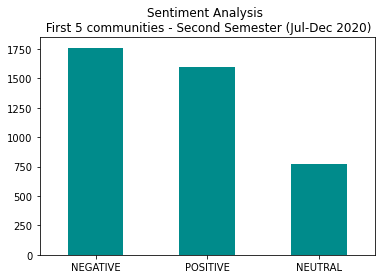

In [25]:
df2_com0 = df2[df2["community"]=="community_0"]
df2_com1 = df2[df2["community"]=="community_1"]
df2_com878 = df2[df2["community"]=="community_878"]
df2_com5 = df2[df2["community"]=="community_5"]
df2_com29 = df2[df2["community"]=="community_29"]

joinDf = [df2_com0, df2_com1, df2_com878, df2_com5, df2_com29]
df2_com = pd.concat(joinDf)
df2_com = df2_com.reset_index(drop=True)
df2_com = df2_com.drop_duplicates()
df2_com["tweet"] = df2_com.tweet.astype("str")
df2_com["preprocessed_tweet"] = df2_com["tweet"].apply(preprocess_tweet)
print(df2_com.community.value_counts())
print('')
print('--------------')
print('')
print(df2_com.sentiment_type.value_counts())


df2_com.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n First 5 communities - Second Semester (Jul-Dec 2020)")
plt.xticks(rotation = 0)




#### Terzo Semestre (gen-giu 2021)

In [26]:
df3['compound'] = [analyser.polarity_scores(x)['compound'] for x in df3['preprocessed_tweet']]
df3['neg'] = [analyser.polarity_scores(x)['neg'] for x in df3['preprocessed_tweet']]
df3['neu'] = [analyser.polarity_scores(x)['neu'] for x in df3['preprocessed_tweet']]
df3['pos'] = [analyser.polarity_scores(x)['pos'] for x in df3['preprocessed_tweet']]

In [27]:
df3['sentiment_type']=''
df3.loc[df3.compound>=0.05,'sentiment_type']='POSITIVE'
df3.loc[(df3.compound > -0.05) & (df3.compound < 0.05),'sentiment_type']='NEUTRAL'
df3.loc[df3.compound<= - 0.05,'sentiment_type']='NEGATIVE'

(array([0, 1, 2]),
 [Text(0, 0, 'POSITIVE'), Text(1, 0, 'NEGATIVE'), Text(2, 0, 'NEUTRAL')])

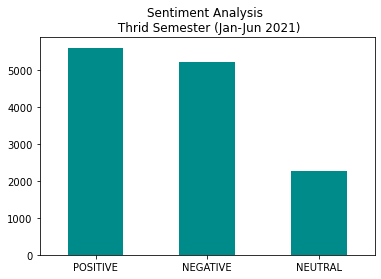

In [28]:
df3.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n Thrid Semester (Jan-Jun 2021)")
plt.xticks(rotation = 0)

In [29]:
df3.sentiment_type.value_counts()

POSITIVE    5617
NEGATIVE    5232
NEUTRAL     2276
Name: sentiment_type, dtype: int64

#### Prime 5 comunità per numero di tweets - Terzo Semestre

community_1013    408
community_850     391
community_1001    276
community_171     253
community_508     218
Name: community, dtype: int64

--------------

NEGATIVE    695
POSITIVE    576
NEUTRAL     275
Name: sentiment_type, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'NEGATIVE'), Text(1, 0, 'POSITIVE'), Text(2, 0, 'NEUTRAL')])

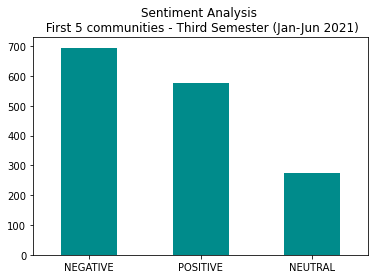

In [30]:
df3_com1013 = df3[df3["community"]=="community_1013"]
df3_com850 = df3[df3["community"]=="community_850"]
df3_com1001 = df3[df3["community"]=="community_1001"]
df3_com171 = df3[df3["community"]=="community_171"]
df3_com508 = df3[df3["community"]=="community_508"]

joinDf = [df3_com1013, df3_com850, df3_com1001, df3_com171, df3_com508]
df3_com = pd.concat(joinDf)
df3_com = df3_com.reset_index(drop=True)
df3_com = df3_com.drop_duplicates()
df3_com["tweet"] = df3_com.tweet.astype("str")
df3_com["preprocessed_tweet"] = df3_com["tweet"].apply(preprocess_tweet)
print(df3_com.community.value_counts())
print('')
print('--------------')
print('')
print(df3_com.sentiment_type.value_counts())


df3_com.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n First 5 communities - Third Semester (Jan-Jun 2021)")
plt.xticks(rotation = 0)




#### Quarto Semestre (lug-dic 2021)

In [31]:
df4['compound'] = [analyser.polarity_scores(x)['compound'] for x in df4['preprocessed_tweet']]
df4['neg'] = [analyser.polarity_scores(x)['neg'] for x in df4['preprocessed_tweet']]
df4['neu'] = [analyser.polarity_scores(x)['neu'] for x in df4['preprocessed_tweet']]
df4['pos'] = [analyser.polarity_scores(x)['pos'] for x in df4['preprocessed_tweet']]

In [32]:
df4['sentiment_type']=''
df4.loc[df4.compound>=0.05,'sentiment_type']='POSITIVE'
df4.loc[(df4.compound > -0.05) & (df4.compound < 0.05),'sentiment_type']='NEUTRAL'
df4.loc[df4.compound<= - 0.05,'sentiment_type']='NEGATIVE'

(array([0, 1, 2]),
 [Text(0, 0, 'NEGATIVE'), Text(1, 0, 'POSITIVE'), Text(2, 0, 'NEUTRAL')])

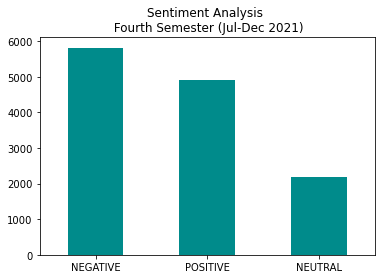

In [33]:
df4.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n Fourth Semester (Jul-Dec 2021)")
plt.xticks(rotation = 0)

In [34]:
df4.sentiment_type.value_counts()

NEGATIVE    5818
POSITIVE    4905
NEUTRAL     2189
Name: sentiment_type, dtype: int64

#### Prime 5 comunità per numero di tweets - Quarto Semestre

community_0      444
community_39     362
community_78     352
community_571    262
community_156    190
Name: community, dtype: int64

--------------

NEGATIVE    815
POSITIVE    542
NEUTRAL     253
Name: sentiment_type, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'NEGATIVE'), Text(1, 0, 'POSITIVE'), Text(2, 0, 'NEUTRAL')])

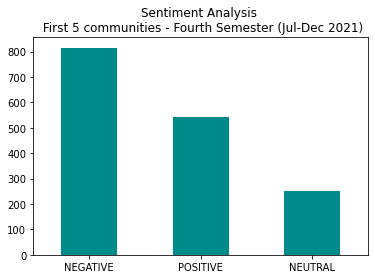

In [35]:
df4_com0 = df4[df4["community"]=="community_0"]
df4_com39 = df4[df4["community"]=="community_39"]
df4_com78 = df4[df4["community"]=="community_78"]
df4_com571 = df4[df4["community"]=="community_571"]
df4_com156 = df4[df4["community"]=="community_156"]

joinDf = [df4_com0, df4_com39, df4_com78, df4_com571, df4_com156]
df4_com = pd.concat(joinDf)
df4_com = df4_com.reset_index(drop=True)
df4_com = df4_com.drop_duplicates()
df4_com["tweet"] = df4_com.tweet.astype("str")
df4_com["preprocessed_tweet"] = df4_com["tweet"].apply(preprocess_tweet)
print(df4_com.community.value_counts())
print('')
print('--------------')
print('')
print(df4_com.sentiment_type.value_counts())


df4_com.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n First 5 communities - Fourth Semester (Jul-Dec 2021)")
plt.xticks(rotation = 0)


#### Quinto Semestre (Gen-Giu 2022)

In [36]:
df5['compound'] = [analyser.polarity_scores(x)['compound'] for x in df5['preprocessed_tweet']]
df5['neg'] = [analyser.polarity_scores(x)['neg'] for x in df5['preprocessed_tweet']]
df5['neu'] = [analyser.polarity_scores(x)['neu'] for x in df5['preprocessed_tweet']]
df5['pos'] = [analyser.polarity_scores(x)['pos'] for x in df5['preprocessed_tweet']]

In [37]:
df5['sentiment_type']=''
df5.loc[df5.compound>=0.05,'sentiment_type']='POSITIVE'
df5.loc[(df5.compound > -0.05) & (df5.compound < 0.05),'sentiment_type']='NEUTRAL'
df5.loc[df5.compound<= - 0.05,'sentiment_type']='NEGATIVE'

(array([0, 1, 2]),
 [Text(0, 0, 'NEGATIVE'), Text(1, 0, 'POSITIVE'), Text(2, 0, 'NEUTRAL')])

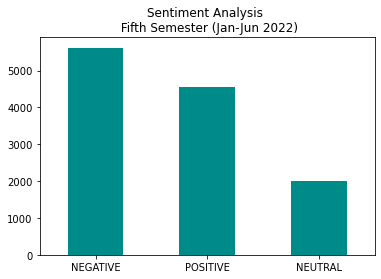

In [38]:
df5.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n Fifth Semester (Jan-Jun 2022)")
plt.xticks(rotation = 0)

In [39]:
df5.sentiment_type.value_counts()

NEGATIVE    5622
POSITIVE    4558
NEUTRAL     1996
Name: sentiment_type, dtype: int64

#### Prime 5 comunità per numero di tweets - Quinto Semestre

community_451    489
community_294    379
community_103    242
community_1      241
community_5      238
Name: community, dtype: int64

--------------

NEGATIVE    771
POSITIVE    542
NEUTRAL     276
Name: sentiment_type, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'NEGATIVE'), Text(1, 0, 'POSITIVE'), Text(2, 0, 'NEUTRAL')])

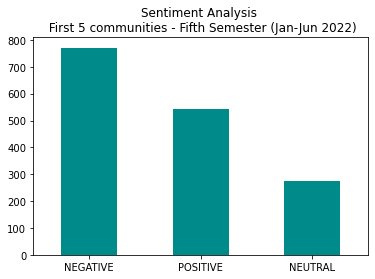

In [40]:
df5_com451 = df5[df5["community"]=="community_451"]
df5_com294 = df5[df5["community"]=="community_294"]
df5_com103 = df5[df5["community"]=="community_103"]
df5_com1 = df5[df5["community"]=="community_1"]
df5_com5 = df5[df5["community"]=="community_5"]

joinDf = [df5_com451, df5_com294, df5_com103, df5_com1, df5_com5]
df5_com = pd.concat(joinDf)
df5_com = df5_com.reset_index(drop=True)
df5_com = df5_com.drop_duplicates()
df5_com["tweet"] = df5_com.tweet.astype("str")
df5_com["preprocessed_tweet"] = df5_com["tweet"].apply(preprocess_tweet)
print(df5_com.community.value_counts())
print('')
print('--------------')
print('')
print(df5_com.sentiment_type.value_counts())


df5_com.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "darkcyan")
plt.title("Sentiment Analysis \n First 5 communities - Fifth Semester (Jan-Jun 2022)")
plt.xticks(rotation = 0)
